# Сборный проект 1. Анализ игровой индустрии

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100
* User_Score — оценка пользователей (максимум 10
* Rating — рейтинг от организации ESRB (англ. Entertainment Software
* Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и
присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Содержание

1. [Загрузка данных](#load_data)
2. [Предобработка данных](#data_preprocessing)
    * [Исправление названий столбцов](#cols_name_editing)
    * [Обработка пропущенных значений](#missed_data)
    * [Замена типов данных](#data_typization)
    * [Обработка дубликатов](#duplicates)
    * [Добавление столбцов](#add_columns)
3. [Исследовательский анализ данных](#eda)
4. [Портрет пользователя каждого региона](#typical_user)
5. [Проверка гипотез](#hypoteses_testing)
6. [Заключение](#conclusion)

<a id="load_data"></a>
### 1. Загрузка данных.

Импортируем необходимые библиотеки и загрузим данные. При чтении csv-файлов будем использовать автоматическое определение разделителя с помощью движка python.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display
from scipy import stats as st



games_df = pd.read_csv('games.csv', sep=None, engine='python')
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видно, что названия столбцов нужно привести к нижнему регистру для большего удобства обращения.

Проверим таблицы на отсутствие данных и соответствие типов.

In [2]:
games_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


Явно пропущенные данные есть в столбцах '*Name*', '*Year_of_Release*', '*Genre*', '*Critic_Score*', '*User_Score*' и '*Rating*'. Столбец '*Year_of_Release*' желательно привести к целочисленному типу, а столбец '*User_Score*' - к типу с плавающей запятой.

Проанализируем содержимое столбцов более детально: для количественных признаков выведем их статистики и распределение, для категориальных - уникальные значения и их количество.

Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Need for Speed: Most Wanted     12
FIFA 14                          9
LEGO Marvel Super Heroes         9
Ratatouille                      9
Madden NFL 07                    9
                                ..
Cooking Mama 5: Bon Appetit!     1
Shanghai: True Valor             1
School Days LxH                  1
Imagine: Fashion Stylist         1
Battlefield Vietnam              1
Name: Name, Length: 11559, dtype: int64

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173

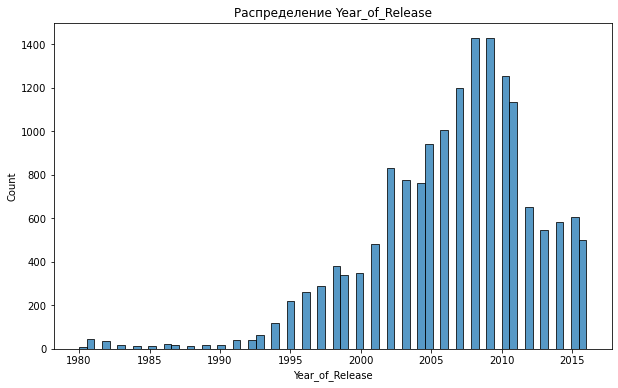

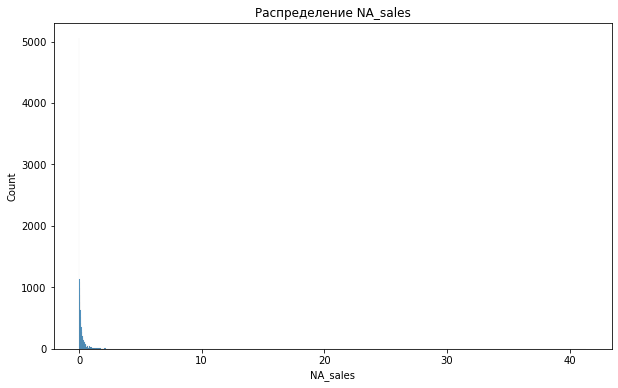

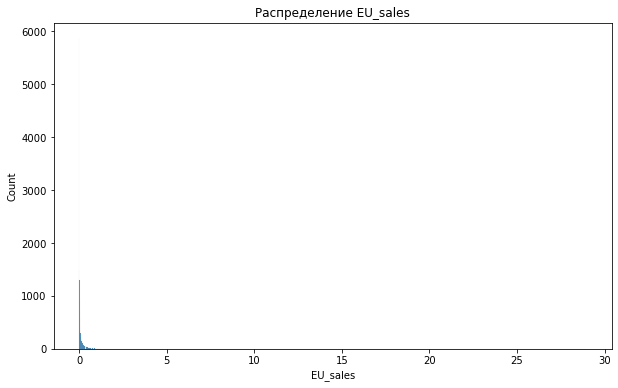

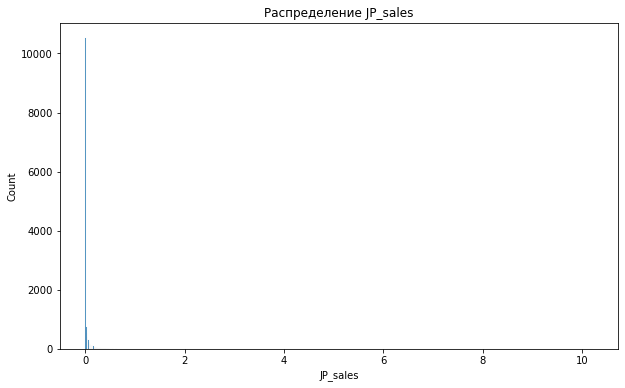

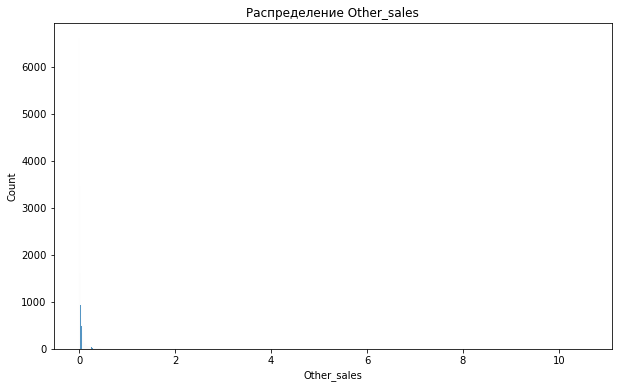

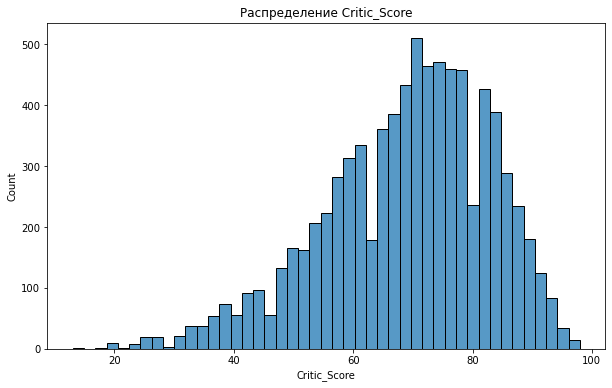

In [3]:
def info(data):
    """
    Функция пробегает по признакам датафрейма и если тип у признака object,
    то выводит уникальные значения и их количество, в противном случае 
    оценивается распределение
    
    """
    for column in data.columns:
        if data[column].dtype == 'object':
            print(column)
            print(data[column].unique())
            print(data[column].value_counts())
            print()
        else:
            print(column)
            print(data[column].describe())
            # Если число уникальных значений в столбце между 1 и длиной столбца, то вывести распределение признака
            if len(data[column].unique()) > 1 and len(data[column].unique()) != len(data[column]):
                plt.figure(figsize=(10, 6))
                sns.histplot(data[column])
                plt.title('Распределение '+ column);
            
info(games_df)

В столбце '*User_Score*' помимо NaN есть ещё оценка 'tbd', что, вероятно, означает "будет определено", поэтому при заполнении пропусков следует посмотреть, можно ли заменить на NaN, чтобы потом привести к типу с плавающей запятой.

### Вывод

* Исходные данные представляют собой таблицу, состоящую из 11 столбцов-признаков и 16715 строк.
* Названия столбцов следует привести к нижнему регистру для удобства последующего обращения к ним.
* Явно пропущенные данные есть в столбцах '*Name*', '*Year_of_Release*', '*Genre*', '*Critic_Score*', '*User_Score*' и '*Rating*'.
* Столбец '*Year_of_Release*' желательно привести к целочисленному типу, а столбец '*User_Score*' - к типу с плавающей запятой.
* В столбце '*User_Score*' помимо NaN есть ещё оценка 'tbd', что, вероятно, означает "будет определено", поэтому при заполнении пропусков следует посмотреть, можно ли заменить на NaN, чтобы потом привести к типу с плавающей запятой.

<a id="data_preprocessing"></a>
### 2. Предобработка данных

<a id="cols_name_editing"></a>
### Исправление названий столбцов

Приведём названия столбцов к нижнему регистру.

In [4]:
games_df.columns = games_df.columns.str.lower().to_list()
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id="missed_data"></a>
### Обработка пропущенных значений

Выведем информацию о пропусках данных в виде таблицы с относительным и абсолютным числами пропусков в каждом столбце, а также тепловую карту датафрейма, где синим обозначены данные, а жёлтым - пропуски.

Столбец             Пропусков, %        Всего пропусков
name                меньше 0.5%         2
year_of_release     1.6%                269
genre               меньше 0.5%         2
critic_score        51.3%               8578
user_score          40.1%               6701
rating              40.5%               6766


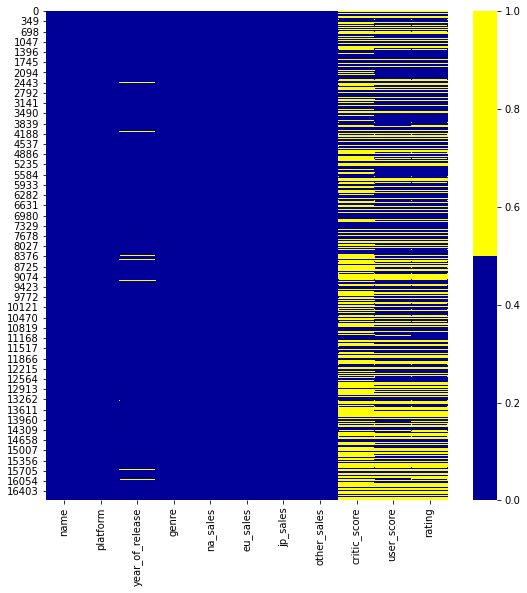

In [5]:
colours = ['#000099', '#ffff00']
plt.figure(figsize=(9, 9))
sns.heatmap(games_df.isnull(), cmap=sns.color_palette(colours))

print('{:<20}{:<20}{}'.format('Столбец', 'Пропусков, %', 'Всего пропусков'))
for col in games_df.columns:
    missed_data_share = games_df[col].isnull().mean()
    missed_data_count = games_df[col].isnull().sum()
    if missed_data_share >= 0.5 * 10**-2:
        print('{:<20}{:<20.1%}{}'.format(col, missed_data_share, missed_data_count))
    elif missed_data_share > 0:
        print('{:<20}{:<20}{}'.format(col, 'меньше 0.5%', missed_data_count))

Как видно, всего два пропущенных значения в столбцах "название" и "жанр" игры. Посмотрим записи, в которых пропущено название игры.

In [6]:
games_df[games_df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В обеих записях оказались одновременно пропущены и название, и жанр. Так как пропусков всего два, то можно смело их удалить.

In [7]:
games_df.dropna(subset=['name'], inplace=True)
games_df['name'].isnull().sum()

0

Теперь посмотрим на записи, в которых пропущен год выхода игры.

In [8]:
games_df[games_df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так как игры часто выходят на нескольких платформах, то вероятно существуют записи с теми же играми на другой платформе, в которых есть дата выхода. Напишем функцию, которая находит такие записи и заменяет пропуски в целевом столбце на имеющуюся информацию по тем же играм.

In [9]:
def user_fill_na(df: pd.DataFrame, col: str, replacement='source'):
    """
    Функция заменяет пропуски в данных, используя имеющуюся информацию для тех же записей, в которых пропущены значения.
    
    replacement - значения, на которые будут заменены пропуски.
    Может принимать значения 'source' (исходные), 'mean', 'median' и 'mode'.
    
    """
    replacements = ['source', 'mean', 'median', 'mode']
    
    if col not in df.columns:
        print('Столбца с именем {} нет в датафрейме!'.format(col))
        return None
    
    if replacement not in replacements:
        print('Данный вариант замены пропусков функцией не предусмотрен!')
        return None
    
    # Выделим записи с пропусками
    filtered_df_with_na = df[df[col].isnull()]
    # И записи с теми же названиями, в которых есть данные в целевом столбце
    filtered_df_good = df[df['name'].isin(filtered_df_with_na['name']) & ~df[col].isnull()]
    
    if replacement == 'source':
        na_join_good = (
            filtered_df_with_na[['name']]
            .join(filtered_df_good.set_index('name', drop=True)[col], on='name')
            .reset_index()
            .drop_duplicates()
            .dropna()
            .set_index('index')
        )
    else:
        pivot_table_good = (
            filtered_df_with_na[['name']]
            .join(filtered_df_good.set_index('name')[col], on='name')
            .pivot_table(index='name', values=col, aggfunc=replacement)
        )
        
        na_join_good = pd.DataFrame([])
        if not pivot_table_good.empty:
            na_join_good = (
                filtered_df_with_na[['name']]
                .join(pivot_table_good, on='name')
                .dropna()
            )
    
    if len(na_join_good) > 0:
        df.loc[na_join_good.index, col] = na_join_good[col]
    print('Пропущенных значений в столбце {} осталось: {}'.format(col, df[col].isnull().sum()))

Было 269 пропущенных значений даты выхода, применим написанную функцию.

In [10]:
user_fill_na(games_df, 'year_of_release')

Пропущенных значений в столбце year_of_release осталось: 146


Количество пропусков уменьшилось. Посмотрим, какая доля приходится на них.

In [11]:
print('Пропущенных значений в столбце year_of_release: {:.2%}'.format(games_df['year_of_release'].isnull().mean()))

Пропущенных значений в столбце year_of_release: 0.87%


Пропусков меньше 1%, значит, можно удалить без потери в качестве при последующем анализе данных.

In [12]:
games_df.dropna(subset=['year_of_release'], inplace=True)
games_df['year_of_release'].isnull().sum()

0

Заменим пропуски в столбце "рейтинга" игры. Напомним, что пропущено было 6766 значений.

In [13]:
user_fill_na(games_df, 'rating')

Пропущенных значений в столбце rating осталось: 6262


Для 504 записей удалось найти соответствующий рейтинг, но пропусков всё ещё достаточно много, чтобы их удалить, поэтому оставим эти записи, а при анализе будем отфильтровывать пропущенные значения.

Теперь заменим пропуски оценок критиков на среднее имеющихся оценок из других платформ. Пропусков было: 8578.

In [14]:
user_fill_na(games_df, 'critic_score', replacement='mean')

Пропущенных значений в столбце critic_score осталось: 7532


Часть пропусков удалось заменить, но их осталось достаточно большое количество, поэтому не будем их удалять.

Далее заменим 'tbd' на NaN и тип данных в столбце "оценки пользователей" на тип с плавающей запятой, чтобы можно было применить написанную функцию замены пропусков.

In [15]:
games_df['user_score'].replace(to_replace='tbd', value=np.nan, inplace=True)
games_df['user_score'] = pd.to_numeric(games_df['user_score'])
games_df['user_score'].dtype

dtype('float64')

In [16]:
games_df['user_score'].isnull().sum()

9027

Заменим пропуски оценок пользователей на среднее имеющихся оценок из других платформ. Пропусков было: 9027.

In [17]:
user_fill_na(games_df, 'user_score', replacement='mean')

Пропущенных значений в столбце user_score осталось: 7928


Таким образом, удалось заменить 1099 пропусков оценок пользователей.

Сбросим индексы датафрейма.

In [18]:
games_df.reset_index(drop=True, inplace=True)

<a id="data_typization"></a>
### Замена типов данных

Осталось заменить тип данных в столбце "год выхода" на *datetime64*.

In [19]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int64')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           10305 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<a id="duplicates"></a>
### Обработка дубликатов

Проверим датафрейм на наличие повторяющихся записей.

In [20]:
games_df.duplicated().sum()

0

Таких записей нет.

<a id="add_columns"></a>
### Добавление столбцов

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [21]:
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].apply(sum, axis=1)
cols = games_df.columns.to_list()
cols = cols[:8] + [cols[-1]] + cols[8:-1]
games_df = games_df[cols]
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


### Вывод

* Названия столбцов приведены к нижнему регистру.
* Строки с пропущенными названием и жанром игры были удалены (всего таких строк: 2).
* Пропущенные значения даты выхода заменены на имеющиеся даты выхода тех же игр, оставшиеся 146 строк удалены.
* Пропущенные значения рейтинга заменены на имеющиеся, оставшиеся 6262 строки оставлены.
* Пропущенные значения оценок критиков заменены на среднее тех же игр, оставшиеся 7532 строки оставлены.
* Значения 'tbd' в столбце "оценки пользователей" заменены на NaN.
* Пропущенные значения оценок пользователей заменены на среднее тех же игр, оставшиеся 7928 строк оставлены.
* Тип данных в столбце "год выхода" заменён на *datetime64*.
* Дубликатов не обнаружено.
* Добавлен столбец суммарных продаж.

<a id="eda"></a>
### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. За единицу примем первый выход игры с данным названием вне зависимости от того, на каких платформах она вышла.

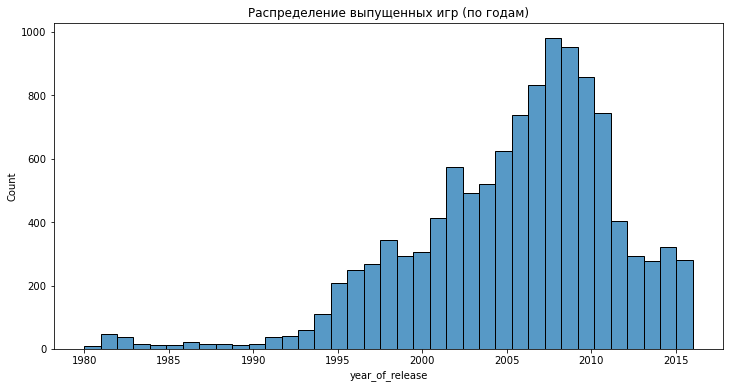

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(
    x='year_of_release',
    data=games_df.pivot_table(index='name', values='year_of_release', aggfunc='min').reset_index(),
    bins=len(games_df['year_of_release'].unique())
)
plt.title('Распределение выпущенных игр (по годам)');

Видно, что основная часть игр была выпущена с 1990 по 2016 год, данные до 1990 года составляют <1% от числа всех выпущенных игр.  
При оценке потенциальной прибыльности вероятно не все данные будут нужны в силу своей неактуальности, поэтому далее необходимо выяснить какой период следует рассматривать для данной оценки и в целом для прогноза на 2017 год.

Посмотрим, как менялись продажи по платформам. Выберем 10 платформ с наибольшими суммарными продажами.

In [23]:
platform_top = (
    games_df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
platform_top.head(10)

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


In [24]:
top10_platform = platform_top.index.to_list()[:10]
top10_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC']

Построим тренды годовых продаж по годам.

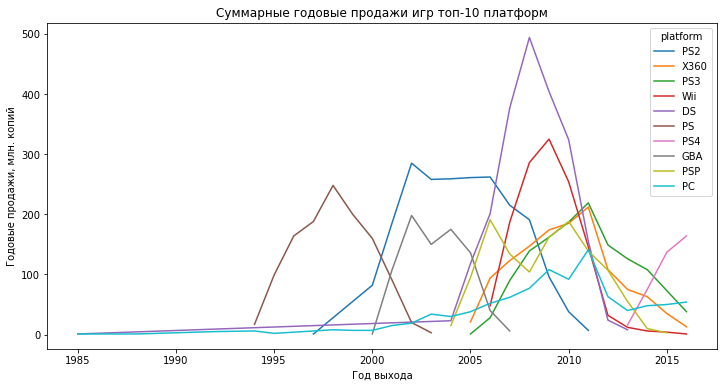

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='year_of_release',
    y='total_sales',
    hue='platform',
    hue_order=top10_platform,
    data=(
        games_df
        .query('platform in @top10_platform')
        .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='count')
        .reset_index()
    )
)
plt.xlabel('Год выхода')
plt.ylabel('Годовые продажи, млн. копий')
plt.title('Суммарные годовые продажи игр топ-10 платформ');

Теперь посчитаем среднее время, за которое на рынке появляется и исчезает одна платформа. Для этого найдём первый и последний год на рынке для каждой платформы и посчитаем среднее разности этих значений.

In [26]:
min_max_year_df = (
    games_df
    .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
    .reset_index()
)

min_max_year_df.columns = ['platform', 'min_year', 'max_year']
min_max_year_df

,platform,min_year,max_year
0,2600,1980,2002
1,3DO,1994,1995
2,3DS,2010,2016
3,DC,1998,2008
4,DS,1985,2013
5,GB,1988,2001
6,GBA,2000,2007
7,GC,2001,2007
8,GEN,1990,1994
9,GG,1992,1992


In [27]:
mean_platform_market_life = (
    min_max_year_df
    .query('max_year < 2016')
    .apply(lambda row: row['max_year'] - row['min_year'], axis=1)
    .mean()
)

if mean_platform_market_life < 5 or (mean_platform_market_life % 10 < 5 and mean_platform_market_life // 10 >= 2):
    print('Среднее время жизни платформы на рынке: {:.1f} года'.format(mean_platform_market_life))
else:
    print('Среднее время жизни платформы на рынке: {:.1f} лет'.format(mean_platform_market_life))

Среднее время жизни платформы на рынке: 7.8 лет


Получается, что чуть меньше 8 лет одна платформа находится на рынке. Тогда для оценки динамики положения платформ на рынке и прогноза на 2017 год возьмём 4 последних года, при этом выбрав только те платформы, для которых продавались игры в 2016 году.

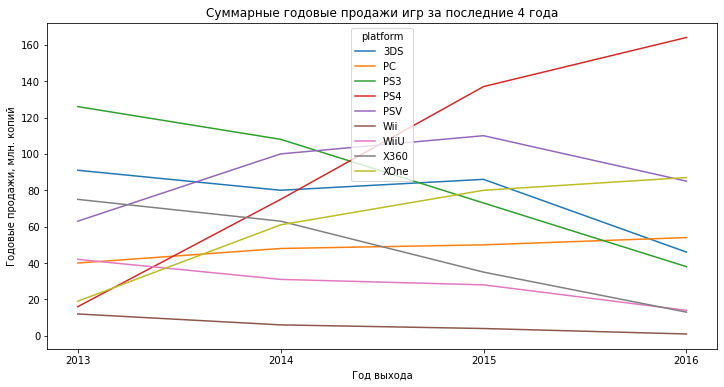

In [28]:
last_4_years_games_subset = games_df[(games_df['platform'].isin(min_max_year_df.query('max_year == 2016')['platform'])) &
                                     (games_df['year_of_release'] >= 2013)]
last_4_years_games_pivot = (
    last_4_years_games_subset
    .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='count')
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='year_of_release',
    y='total_sales',
    hue='platform',
    data=last_4_years_games_pivot
)
plt.xlabel('Год выхода')
plt.xticks(last_4_years_games_pivot['year_of_release'].unique())
plt.ylabel('Годовые продажи, млн. копий')
plt.title('Суммарные годовые продажи игр за последние 4 года');

В выборку попали 9 платформ, из них явный рост по продажам показывают только PC, PS4 и XOne. Можно детальнее рассмотреть данные платформы с точки зрения роста продаж в 2016 году. Для этого посчитаем относительный рост и построим столбчатую диаграмму роста продаж по платформам.

In [29]:
def calc_rate(df, year):
    """
    Функция считает относительный рост в текущем году по сравнению с предыдущим.
    
    """
    sales_curr_year = df.query('platform == @platform_ and year_of_release == @year')['total_sales'].values[0]
    sales_prev_year = df.query('platform == @platform_ and year_of_release == @year - 1')['total_sales'].values[0]
    
    rate = (sales_curr_year - sales_prev_year) / sales_prev_year
    return rate


platform_rate_df = pd.DataFrame([], columns=['platform', 'rate'])

for i, platform_ in enumerate(last_4_years_games_pivot['platform'].unique()):
    rate = calc_rate(last_4_years_games_pivot, 2016)
    platform_rate_df.loc[i] = [platform_, rate]
    
platform_rate_df = platform_rate_df.sort_values(by='rate', ascending=False).reset_index(drop=True)
platform_rate_df

,platform,rate
0,PS4,0.197080
1,XOne,0.087500
2,PC,0.080000
3,PSV,-0.227273
4,3DS,-0.465116
5,PS3,-0.479452
6,WiiU,-0.500000
7,X360,-0.628571
8,Wii,-0.750000


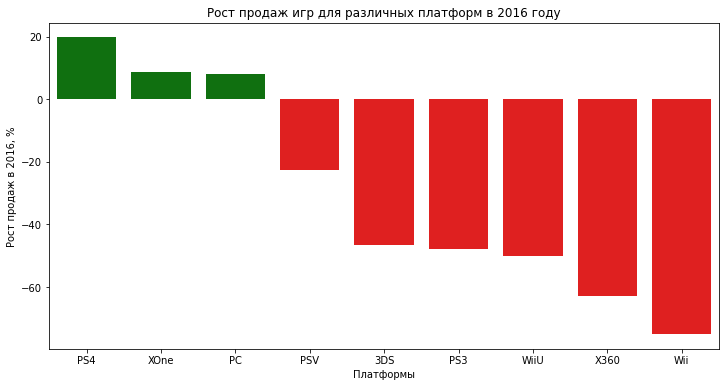

In [30]:
palette = {
    vec[0]: 'g'
    if vec[1] >= 0
    else 'r'
    for vec in platform_rate_df.values
}

plt.figure(figsize=(12, 6))
sns.barplot(
    x=platform_rate_df['platform'],
    y=platform_rate_df['rate'] * 100,
    orient='v',
    palette=palette
)
plt.xlabel('Платформы')
plt.ylabel('Рост продаж в 2016, %')
plt.title('Рост продаж игр для различных платформ в 2016 году');

Явные лидеры: PS4 (19.7%), XOne (8.8%) и PC (8%) - выберем данные платформы и посмотрим на динамику роста продаж за последние 4 года.

In [31]:
best_platform_rate_df = pd.DataFrame([], columns=['platform', 'year', 'rate'])

i = 0
for platform_ in platform_rate_df.loc[:2, 'platform']:
    for year in range(2014, 2017):
        rate = calc_rate(last_4_years_games_pivot, year) * 100
        best_platform_rate_df.loc[i] = [platform_, year, rate]
        i += 1
    
best_platform_rate_df

,platform,year,rate
0,PS4,2014,368.750000
1,PS4,2015,82.666667
2,PS4,2016,19.708029
3,XOne,2014,221.052632
4,XOne,2015,31.147541
5,XOne,2016,8.750000
6,PC,2014,20.000000
7,PC,2015,4.166667
8,PC,2016,8.000000


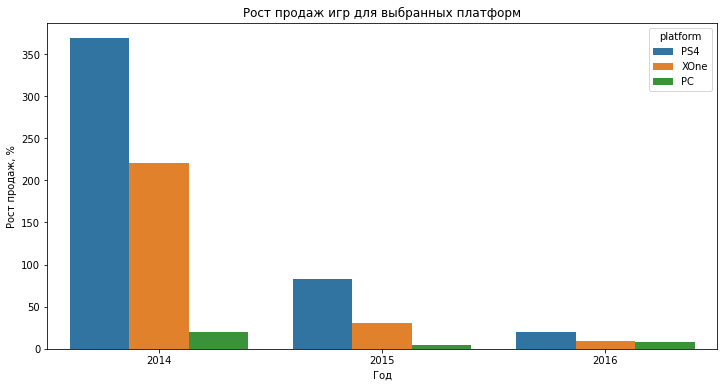

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='year',
    y='rate',
    hue='platform',
    data=best_platform_rate_df
)
plt.xlabel('Год')
plt.ylabel('Рост продаж, %')
plt.title('Рост продаж игр для выбранных платформ');

Видно, что рост продаж для платформы PS4 все три года падает, но при этом является наибольшим среди выбранных платформ. PC же показывает небольшое увеличение роста продаж в 2016 году, почти догнав XOne.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

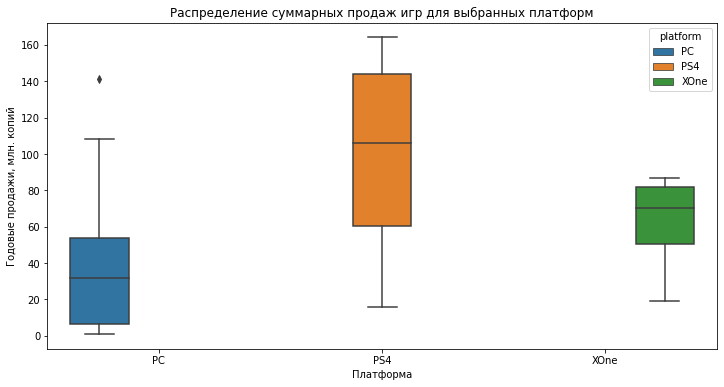

In [33]:
games_pivot = (
    games_df
    .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='count')
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='platform',
    y='total_sales',
    hue='platform',
    data=games_pivot.query('platform in @best_platform_rate_df.platform')
)
plt.xlabel('Платформа')
plt.ylabel('Годовые продажи, млн. копий')
plt.title('Распределение суммарных продаж игр для выбранных платформ');

Здесь заметно, самые высокие годовые суммарные продажи для платформы PS4, на втором месте XOne, на третьем - PC. Это означает, что при текущей динамике роста продаж в 2017 году наиболее вероятно, что PS4 также будет на первом месте по суммарным годовым продажам.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

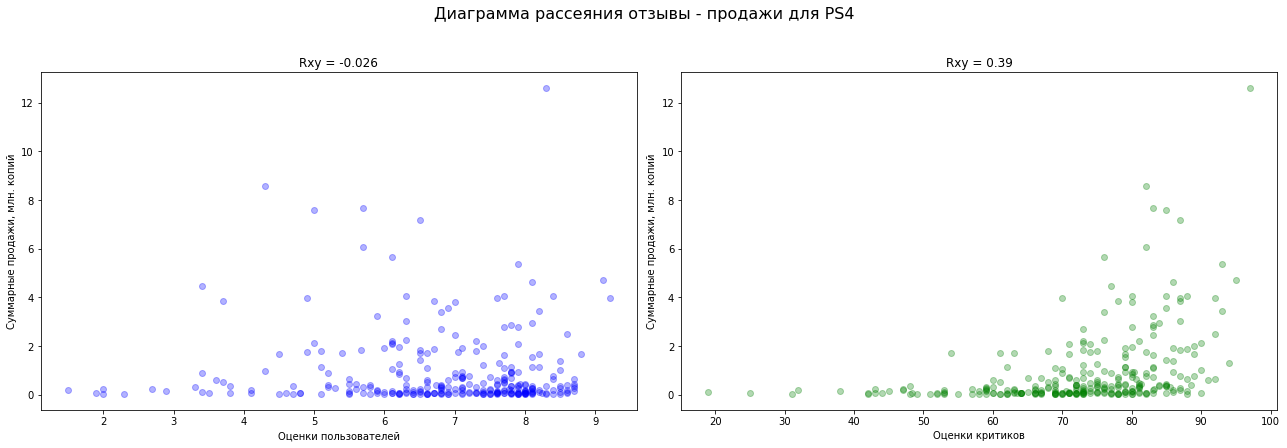

In [34]:
def make_scatter_for_scores(platform):
    """
    Функция строит диаграммы рассеяния для оценок пользователей и оценок критиков относительно продаж для выбранной платформы.
    
    """
    subset = games_df[(games_df['platform'] == platform) & (~games_df['user_score'].isnull()) &
                      (~games_df['critic_score'].isnull())]

    corr_coef_u = np.corrcoef(subset['user_score'], subset['total_sales'])[0, 1]
    corr_coef_c = np.corrcoef(subset['critic_score'], subset['total_sales'])[0, 1]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    axes[0].scatter(
        x=subset['user_score'],
        y=subset['total_sales'],
        c='blue',
        alpha=0.3
    )
    axes[0].set_title('Rxy = ' + str(np.round(corr_coef_u, decimals=3)));
    axes[0].set_xlabel('Оценки пользователей')
    axes[0].set_ylabel('Суммарные продажи, млн. копий')

    axes[1].scatter(
        x=subset['critic_score'],
        y=subset['total_sales'],
        c='green',
        alpha=0.3
    )
    axes[1].set_title('Rxy = ' + str(np.round(corr_coef_c, decimals=3)));
    axes[1].set_xlabel('Оценки критиков')
    axes[1].set_ylabel('Суммарные продажи, млн. копий')

    fig.suptitle('Диаграмма рассеяния отзывы - продажи для ' + platform, fontsize=16, y=1.03)
    fig.tight_layout()
    plt.show()
    

make_scatter_for_scores('PS4')

Для PS4 связь между отзывами пользователей и продажами очень слабая. А вот между отзывами критиков и продажами обнаруживается слабая положительная связь.

Посмотрим, как эти данные соотносятся для платформы PC.

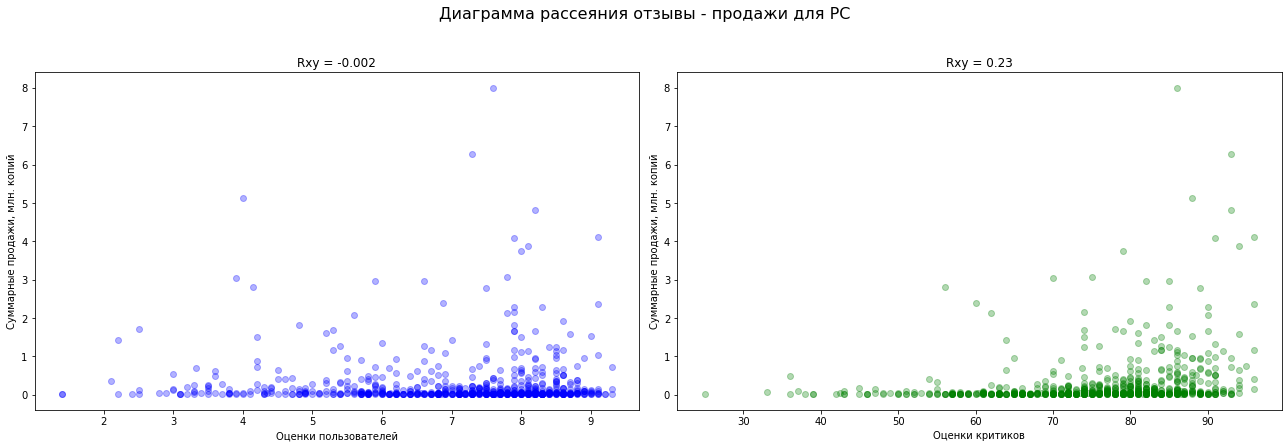

In [35]:
make_scatter_for_scores('PC')

Такая же, как и в случае PS4, очень слабая связь между отзывами пользователей и продажами. А вот между отзывами критиков и продажами также обнаруживается слабая положительная связь.  
В целом всё закономерно, так как на продажи в основном влияет продвижение игр и популярность платформ, и уже в третью очередь оценки критиков.

Посмотрим на общее распределение игр по жанрам.

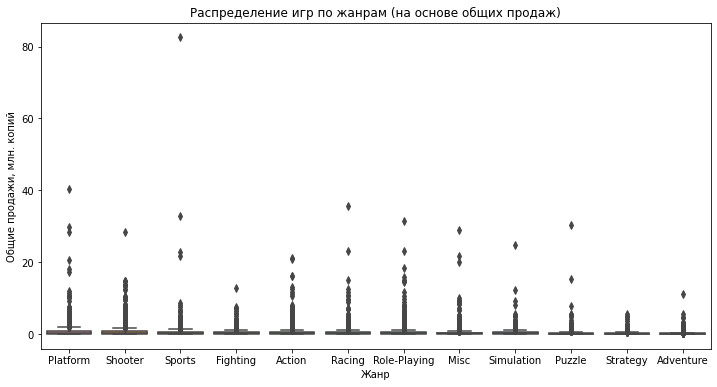

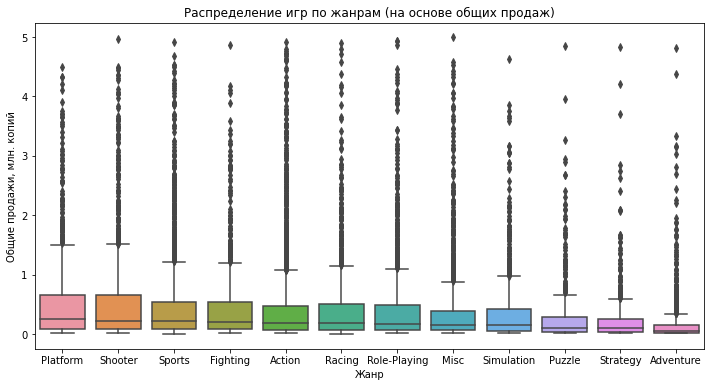

In [48]:
aux_pivot = games_df.pivot_table(index='genre', values='total_sales', aggfunc='median')
aux_pivot.sort_values(by='total_sales', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='genre',
    y='total_sales',
    data=games_df,
    order=aux_pivot.index
)
plt.xlabel('Жанр')
plt.ylabel('Общие продажи, млн. копий')
plt.title('Распределение игр по жанрам (на основе общих продаж)');

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='genre',
    y='total_sales',
    data=games_df[games_df['total_sales'] < 5],
    order=aux_pivot.index
)
plt.xlabel('Жанр')
plt.ylabel('Общие продажи, млн. копий')
plt.title('Распределение игр по жанрам (на основе общих продаж)');

По графикам можно сказать, что самые продаваемые жанры игр - "платформер" и "шутер", а малопродаваемыми можно назвать "приключения". Однако это справедливо только для отдельных игр.

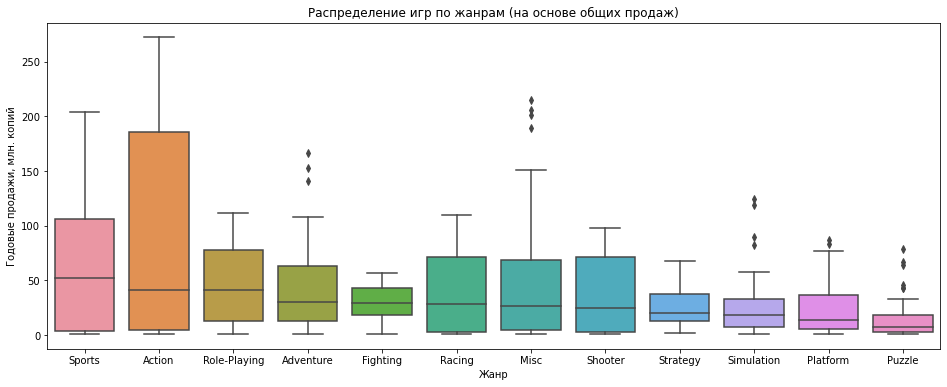

In [55]:
games_pivot = (
    games_df
    .pivot_table(index=['year_of_release', 'genre'], values='total_sales', aggfunc='count')
    .reset_index()
)

aux_pivot = games_pivot.pivot_table(index='genre', values='total_sales', aggfunc='median')
aux_pivot.sort_values(by='total_sales', ascending=False, inplace=True)

plt.figure(figsize=(16, 6))
sns.boxplot(
    x='genre',
    y='total_sales',
    data=games_pivot,
    order=aux_pivot.index
)
plt.xlabel('Жанр')
plt.ylabel('Годовые продажи, млн. копий')
plt.title('Распределение игр по жанрам (на основе общих продаж)');

Если взять годовые продажи, то самыми прибыльными становятся "спорт" и "экшн", а также "рпг". Меньше всего прибыли приносят "головоломки" и "платформеры".

### Вывод

* Сформирован топ-10 платформ по суммарным продажам:


|№ | Платформа     | Суммарные продажи, млн. копий  |
|:-:|:-------------:|:------------------------------:|
1|PS2 | 1247.16
2|X360 | 966.61
3|PS3 | 935.19
4|Wii | 903.31
5|DS | 804.28
6|PS | 727.58
7|PS4 | 314.14
8|GBA | 313.73
9|PSP | 293.57
10|PC | 258.86

* Определено реднее время жизни платформы на рынке: 7.8 лет.
* В качестве актуального периода выбраны 4 года. За это время стабильно растут продажи для PS4, XOne и PC, остальные либо монотонно падают в продажах, либо, пройдя максимум, также падают. Потенциально прибыльными признаны: PS4, XOne и PC.
* Самые высокие годовые суммарные продажи для платформы PS4, на втором месте XOne, на третьем - PC. При текущей динамике роста продаж в 2017 году наиболее вероятно, что PS4 будет на первом месте по суммарным годовым продажам, т.е. самой прибыльной платформой.
* Анализ влияния отзывов на продажи дал следующие результаты:
    * Между отзывами пользователей и продажами очень слабая связь.
    * Между отзывами критиков и продажами есть слабая положительная связь.
* Что в целом закономерно, так как на продажи в основном влияет продвижение игр и популярность платформ, и уже в третью очередь оценки критиков.
* Анализ распределения игр по жанрам дал следующие результаты:
    * Если рассматривать отдельные игры, то самые продаваемые жанры игр - "платформер" и "шутер", а малопродаваемые - "приключения".
    * Если рассматривать годовые продажи, то самые прибыльные - спортивные симуляторы, "экшн-игры" и ролевые. Самыми неприбыльными являются "головоломки" и "платформеры".

<a id="typical_user"></a>
### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [56]:
def define_top_n(df, object_col, criteria_col, criteria_func, n):
    """
    Функция определяет топ N объектов из датафрейма по столбцу-критерию.
    
    df - исходный датафрейм
    object_col - столбец объектов
    criteria_col - столбец-критерий
    criteria_func - функция, аггрегирующая значения в столбце-критерии ('mean', 'count', etc.)
    n - размер таблицы рейтинга
    
    """
    try:
        top_df = (
            df
            .pivot_table(index=object_col, values=criteria_col, aggfunc=criteria_func)
            .sort_values(by=criteria_col, ascending=False)
            .iloc[:n, :]
        )
    except Exception as e:
        print(type(e), e)
        return None
        
    return top_df


top5_platform_dict = {}
for region in ['na', 'eu', 'jp']:
    criteria_col = region + '_sales'
    top5_platform_dict[region] = define_top_n(games_df, 'platform', criteria_col, 'sum', 5)

[display(v) for v in top5_platform_dict.values()];

,na_sales
platform,
X360,599.15
PS2,580.09
Wii,494.01
PS3,391.60
DS,381.38


,eu_sales
platform,
PS2,337.05
PS3,328.97
X360,269.79
Wii,261.48
PS,212.39


,jp_sales
platform,
DS,175.02
PS,139.78
PS2,137.74
SNES,116.55
3DS,100.64


В Америке на первом месте Xbox 360, в Европе он только на третьем месте, а в Японии не попал в топ-5. PS2, похоже единственная приставка, попавшая во все три топ-5 по продажам: 1-е место в Европе, 2-е - в Америке, 3-е - в Японии, причём заметно, что в Японии в целом популярны "свои" консоли (Sony и Nintendo), а в Европе большинство консолей в топ-5 - производства Sony.

Теперь определим для пользователя каждого региона самые популярные жанры.

In [57]:
top5_genre_dict = {}
for region in ['na', 'eu', 'jp']:
    criteria_col = region + '_sales'
    top5_genre_dict[region] = define_top_n(games_df, 'genre', criteria_col, 'sum', 5)

[display(v) for v in top5_genre_dict.values()];

,na_sales
genre,
Action,873.70
Sports,681.69
Shooter,590.35
Platform,444.44
Misc,401.69


,eu_sales
genre,
Action,517.58
Sports,375.60
Shooter,316.96
Racing,235.47
Misc,211.32


,jp_sales
genre,
Role-Playing,353.88
Action,160.15
Sports,135.27
Platform,130.71
Misc,108.04


Экшн-игры и спортивные симуляторы лидируют в Европе и Америке и занимают 2-е и 3-е места в Японии, что подтверждает высокие общие продажи данных жанров, также заметно более чем двойное превосходство RPG в Японии. 5-е место везде занимают игры смешанных жанров, на 4-м месте в Америке и в Японии - "платформеры", а в Европе - гоночные симуляторы.

Далее проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе. Для этого построим диаграммы рассеяния для каждого региона.

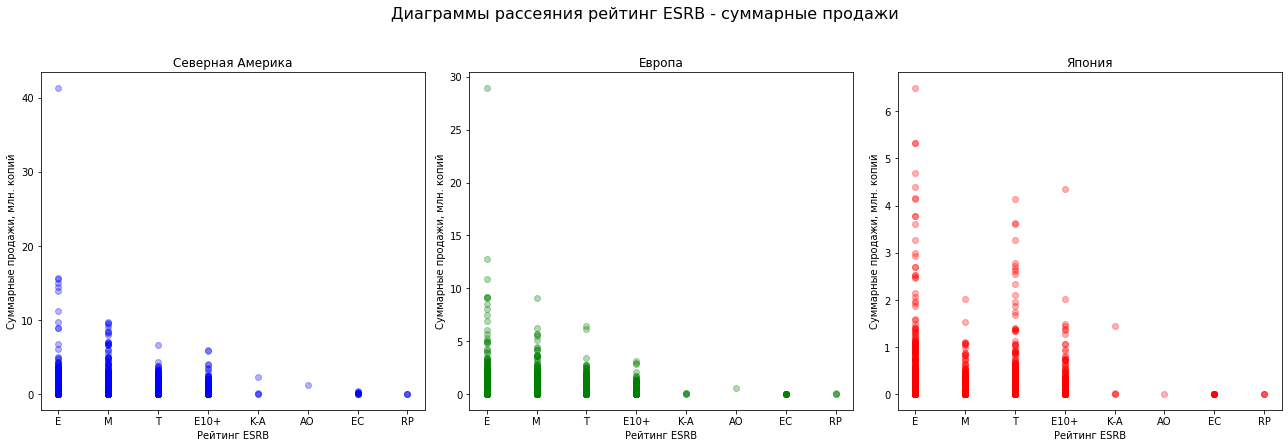

In [58]:
subset = games_df[~games_df['rating'].isnull()]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(
    x=subset['rating'],
    y=subset['na_sales'],
    c='blue',
    alpha=0.3
)
axes[0].set_title('Северная Америка');
axes[0].set_xlabel('Рейтинг ESRB')
axes[0].set_ylabel('Суммарные продажи, млн. копий')

axes[1].scatter(
    x=subset['rating'],
    y=subset['eu_sales'],
    c='green',
    alpha=0.3
)
axes[1].set_title('Европа');
axes[1].set_xlabel('Рейтинг ESRB')
axes[1].set_ylabel('Суммарные продажи, млн. копий')

axes[2].scatter(
    x=subset['rating'],
    y=subset['jp_sales'],
    c='red',
    alpha=0.3
)
axes[2].set_title('Япония');
axes[2].set_xlabel('Рейтинг ESRB')
axes[2].set_ylabel('Суммарные продажи, млн. копий')

fig.suptitle('Диаграммы рассеяния рейтинг ESRB - суммарные продажи', fontsize=16, y=1.03)
fig.tight_layout()
plt.show()

В целом, во всех трёх регионах похожая ситуация: игры "для всех" имеют самые высокие продажи, для детей (6+) и с неопределённым рейтингом - самые низкие продажи. В Северной Америке и Европе продаж игр для подростков (17+) больше, чем для подростков (13+), а в Японии - наоборот. Потом идут продажи игр для категории (10+) и их более раннего обозначения 'K-A'. Меньше всего игр продаётся в категории "только для взрослых" (18+).  
Таким образом, рейтинг игры очень слабо влияет на продажи в отдельном регионе.

### Вывод

* Для каждого региона определены самые популярные платформы и жанры:
    * В Америке на первом месте Xbox 360 и игры жанров Action и Sports.
    * В Европе на первом месте PS2 и также жанры Action и Sports.
    * В Японии на первом месте Nintendo DS и игры жанров RPG и Action.
* Анализ влияния рейтинга ESRB на продажи в регионах показал, что во всех трёх регионах похожая ситуация, за исключением продаж игр для подростков (17+) и подростков (13+): в Северной Америке и Европе продаж игр для подростков (17+) больше, чем для подростков (13+), а в Японии - наоборот. Таким образом, рейтинг игры очень слабо влияет на продажи в отдельном регионе.

<a id="hypoteses_testing"></a>
### Проверка гипотез

Предположение: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Рассмотрим распределения оценок для данных платформ.

Платформа Выборочная дисперсия
XOne      1.890
PC        2.322


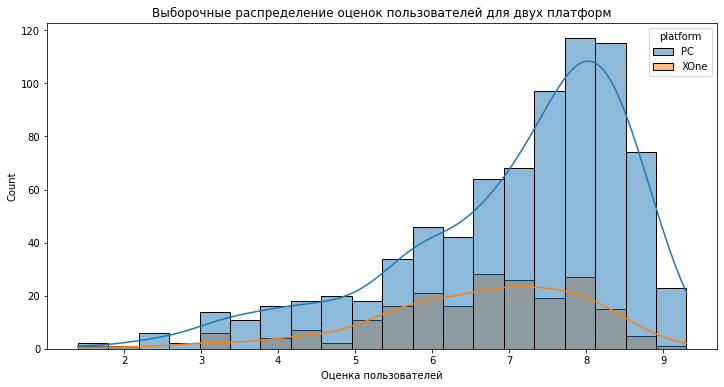

In [67]:
platforms = ['XOne', 'PC']
hist_data = games_df[(games_df['platform'].isin(platforms)) & (~games_df['user_score'].isnull())][['platform', 'user_score']]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=hist_data,
    x='user_score',
    hue='platform',
    kde=True
)
plt.xlabel('Оценка пользователей')
plt.title('Выборочные распределение оценок пользователей для двух платформ');

print('{:<10}{}'.format('Платформа', 'Выборочная дисперсия'))
for platform in platforms:
    print('{:<10}{:.3f}'.format(platform, np.var(hist_data[hist_data['platform'] == platform]['user_score'])))
fig.show()

Построим графики квантиль-квантиль для обеих платформ.

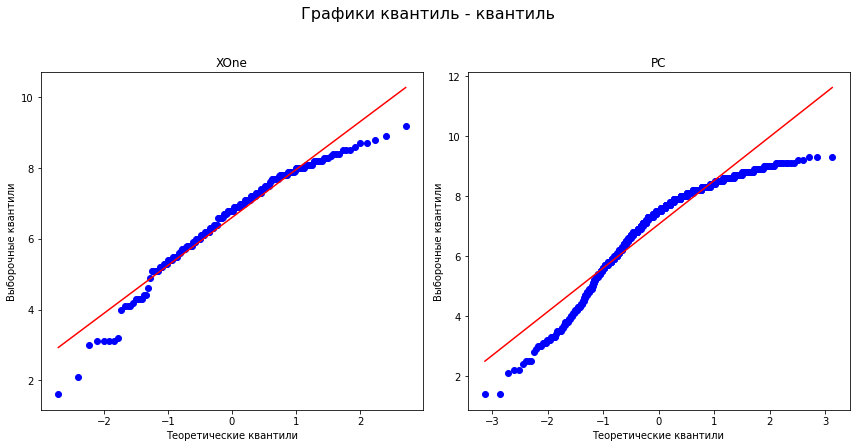

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, platform in enumerate(platforms):
    plt.sca(axes[i])
    st.probplot(hist_data[hist_data['platform'] == platform]['user_score'], plot=plt)
    axes[i].set_title(platform);
    axes[i].set_xlabel('Теоретические квантили')
    axes[i].set_ylabel('Выборочные квантили')

fig.suptitle('Графики квантиль - квантиль', fontsize=16, y=1.03)
fig.tight_layout()
plt.show()

Распределения ассиметричны, что говорит об их ненормальности, при этом видно, что вариативность выше у оценок Xbox One. По графикам Q-Q видно, что выборочные значения отходят от нормального распределения: левый "хвост" тяжелее, чем у нормального распределения, а правый "хвост" легче. Выбросов не обнаружено.

Нулевая и альтернативная гипотезы формулируются следующим образом:
* $H_0$: средние пользовательские рейтинги платформ Xbox One и PC равны.
* $H_1$: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Уровень значимости зададим равным 0,1. Проверять гипотезу будем T-тестом для двух независимых выборок с неравными дисперсиями, так как выборочные распределения унимодальны, без выбросов, а значит, можно положиться на ЦПТ и утверждать, что выборочные средние распределены нормально.

In [75]:
alpha = 0.1

ttest_result = st.ttest_ind(
    hist_data[hist_data['platform'] == platforms[0]]['user_score'],
    hist_data[hist_data['platform'] == platforms[1]]['user_score'],
    equal_var=False
)
print('P-value равно', ttest_result.pvalue)

if ttest_result.pvalue < alpha:
    print('Различие средних считать статистически значимым, отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Различие средних считать случайным, принимаем нулевую гипотезу')

P-value равно 4.16402599964162e-05
Различие средних считать статистически значимым, отвергаем нулевую гипотезу о равенстве средних


Первое предположение не подтвердилось, т.е. средние пользовательские рейтинги платформ Xbox One и PC скорее всего различаются.

Следующее предположение: средние пользовательские рейтинги жанров Action и Sports разные.
Рассмотрим распределения оценок для данных жанров.

Жанр      Выборочная дисперсия
PC        2.000
PC        2.553


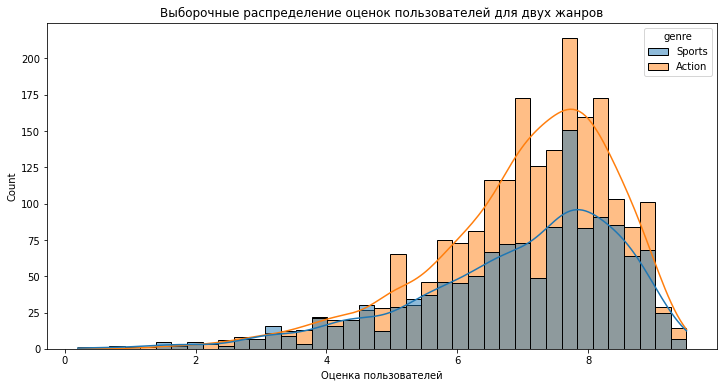

In [77]:
genres = ['Action', 'Sports']

hist_data = games_df[(games_df['genre'].isin(genres)) & (~games_df['user_score'].isnull())][['genre', 'user_score']]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=hist_data,
    x='user_score',
    hue='genre',
    kde=True
)
plt.xlabel('Оценка пользователей')
plt.title('Выборочные распределение оценок пользователей для двух жанров');

print('{:<10}{}'.format('Жанр', 'Выборочная дисперсия'))
for genre in genres:
    print('{:<10}{:.3f}'.format(platform, np.var(hist_data[hist_data['genre'] == genre]['user_score'])))
fig.show()

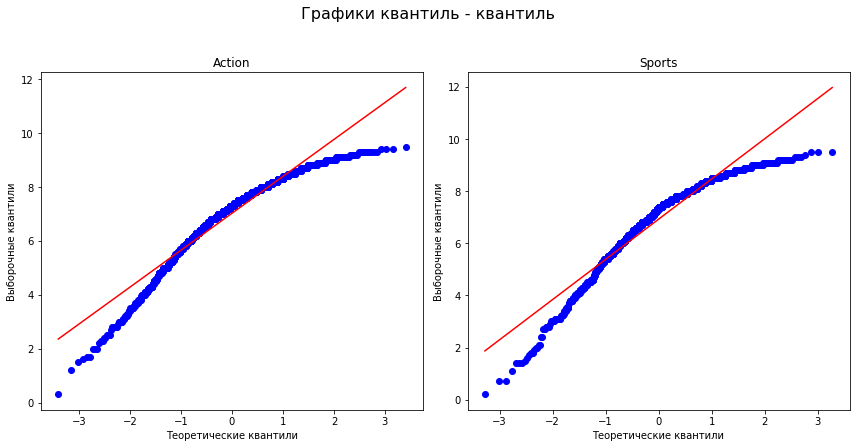

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, genre in enumerate(genres):
    plt.sca(axes[i])
    st.probplot(hist_data[hist_data['genre'] == genre]['user_score'], plot=plt)
    axes[i].set_title(genre);
    axes[i].set_xlabel('Теоретические квантили')
    axes[i].set_ylabel('Выборочные квантили')

fig.suptitle('Графики квантиль - квантиль', fontsize=16, y=1.03)
fig.tight_layout()
plt.show()

Распределения ассиметричны, что говорит об их ненормальности, при этом видно, что вариативность выше у оценок спортивных симуляторов. По графикам Q-Q видно, что выборочные значения отходят от нормального распределения: левый "хвост" тяжелее, чем у нормального распределения, а правый "хвост" легче. Выбросов не обнаружено.

Нулевая и альтернативная гипотезы формулируются следующим образом:
* $H_0$: средние пользовательские рейтинги жанров Action и Sports равны.
* $H_1$: средние пользовательские рейтинги жанров Action и Sports не равны.

Уровень значимости зададим равным 0,1. Проверять гипотезу будем T-тестом для двух независимых выборок с неравными дисперсиями, так как выборочные распределения унимодальны, без выбросов, а значит, можно положиться на ЦПТ и утверждать, что выборочные средние распределены нормально.

In [79]:
alpha = 0.1

ttest_result = st.ttest_ind(
    hist_data[hist_data['genre'] == genres[0]]['user_score'],
    hist_data[hist_data['genre'] == genres[1]]['user_score'],
    equal_var=False
)
print('P-value равно', ttest_result.pvalue)

if ttest_result.pvalue < alpha:
    print('Различие средних считать статистически значимым, отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Различие средних считать случайным, принимаем нулевую гипотезу')

P-value равно 0.059051937711369795
Различие средних считать статистически значимым, отвергаем нулевую гипотезу о равенстве средних


Похоже, что второе предположение правдиво и средние пользовательские рейтинги жанров Action и Sports разные. Хотя здесь не всё так однозначно: выбери мы уровень значимости 0.05 и нулевую гипотезу уже нельзя было бы отвергнуть.

### Вывод

Таким образом, гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC была отвергнута и различие  средних следует считать статистически значимым. А предположение о различии средних пользовательских рейтингов жанров Action и Sports скорее всего правдиво, так как нулевая гипотеза о равенстве средних была отвергнута.

<a id="conclusion"></a>
### Заключение

Исходные данные представляют собой таблицу, состоящую из 11 столбцов-признаков и 16715 строк.
* Названия столбцов следует привести к нижнему регистру для удобства последующего обращения к ним.
* Явно пропущенные данные есть в столбцах '*Name*', '*Year_of_Release*', '*Genre*', '*Critic_Score*', '*User_Score*' и '*Rating*'.
* Столбец '*Year_of_Release*' желательно привести к целочисленному типу, а столбец '*User_Score*' - к типу с плавающей запятой.
* В столбце '*User_Score*' помимо NaN есть ещё оценка 'tbd', что, вероятно, означает "будет определено", поэтому при заполнении пропусков следует посмотреть, можно ли заменить на NaN, чтобы потом привести к типу с плавающей запятой.

В ходе предобработки и подготовки данных проделано следующее:
* Названия столбцов приведены к нижнему регистру.
* Строки с пропущенными названием и жанром игры были удалены (всего таких строк: 2).
* Пропущенные значения даты выхода заменены на имеющиеся даты выхода тех же игр, оставшиеся 146 строк удалены.
* Пропущенные значения рейтинга заменены на имеющиеся, оставшиеся 6262 строки оставлены.
* Пропущенные значения оценок критиков заменены на среднее тех же игр, оставшиеся 7532 строки оставлены.
* Значения 'tbd' в столбце "оценки пользователей" заменены на NaN.
* Пропущенные значения оценок пользователей заменены на среднее тех же игр, оставшиеся 7928 строк оставлены.
* Тип данных в столбце "год выхода" заменён на *datetime64*.
* Дубликатов не обнаружено.
* Добавлен столбец суммарных продаж.

Исследовательский анализ дал следующие результаты:
* Сформирован топ-10 платформ по суммарным продажам:


|№ | Платформа     | Суммарные продажи, млн. копий  |
|:-:|:-------------:|:------------------------------:|
1|PS2 | 1247.16
2|X360 | 966.61
3|PS3 | 935.19
4|Wii | 903.31
5|DS | 804.28
6|PS | 727.58
7|PS4 | 314.14
8|GBA | 313.73
9|PSP | 293.57
10|PC | 258.86

* Определено реднее время жизни платформы на рынке: 7.8 лет.
* В качестве актуального периода выбраны 4 года. За это время стабильно растут продажи для PS4, XOne и PC, остальные либо монотонно падают в продажах, либо, пройдя максимум, также падают. Потенциально прибыльными признаны: PS4, XOne и PC.
* Самые высокие годовые суммарные продажи для платформы PS4, на втором месте XOne, на третьем - PC. При текущей динамике роста продаж в 2017 году наиболее вероятно, что PS4 будет на первом месте по суммарным годовым продажам, т.е. самой прибыльной платформой.
* Анализ влияния отзывов на продажи дал следующие результаты:
    * Между отзывами пользователей и продажами очень слабая связь.
    * Между отзывами критиков и продажами есть слабая положительная связь.
* Что в целом закономерно, так как на продажи в основном влияет продвижение игр и популярность платформ, и уже в третью очередь оценки критиков.
* Анализ распределения игр по жанрам дал следующие результаты:
    * Если рассматривать отдельные игры, то самые продаваемые жанры игр - "платформер" и "шутер", а малопродаваемые - "приключения".
    * Если рассматривать годовые продажи, то самые прибыльные - спортивные симуляторы, "экшн-игры" и ролевые. Самыми неприбыльными являются "головоломки" и "платформеры".

* Для каждого региона определены самые популярные платформы и жанры:
    * В Америке на первом месте Xbox 360 и игры жанров Action и Sports.
    * В Европе на первом месте PS2 и также жанры Action и Sports.
    * В Японии на первом месте Nintendo DS и игры жанров RPG и Action.
* Анализ влияния рейтинга ESRB на продажи в регионах показал, что во всех трёх регионах похожая ситуация, за исключением продаж игр для подростков (17+) и подростков (13+): в Северной Америке и Европе продаж игр для подростков (17+) больше, чем для подростков (13+), а в Японии - наоборот. Таким образом, рейтинг игры очень слабо влияет на продажи в отдельном регионе.

В результате проверки гипотез получены следующие результаты:
* Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC была отвергнута и различие  средних следует считать статистически значимым.
* Предположение о различии средних пользовательских рейтингов жанров Action и Sports скорее всего правдиво, так как нулевая гипотеза о равенстве средних была отвергнута.